In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import numpy as np
from matplotlib.pyplot import *
import matplotlib

/home/george/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


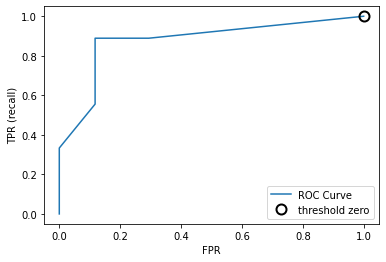

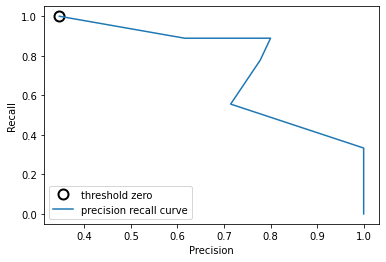

Test set predictions:
 [2 1 1 1 1 2 1 1 2 1 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 1]
Test set score: 0.81
Test set score: 0.81


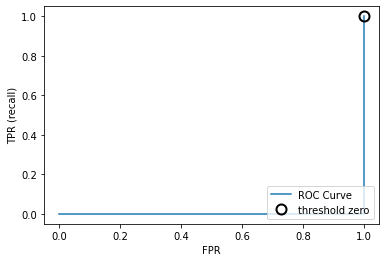

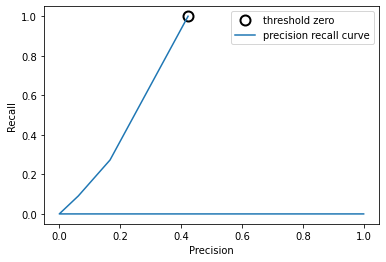

Test set predictions:
 [1 1 2 1 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 2]
Test set score: 1.00
Test set score: 1.00


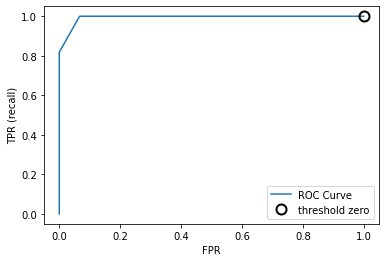

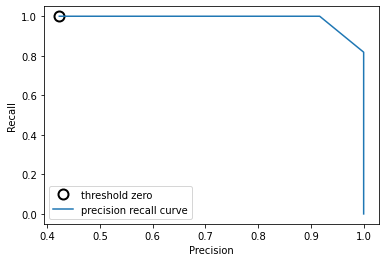

Test set predictions:
 [1 1 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 1 2 1 2 2 2 1 1 2]
Test set score: 0.92
Test set score: 0.92


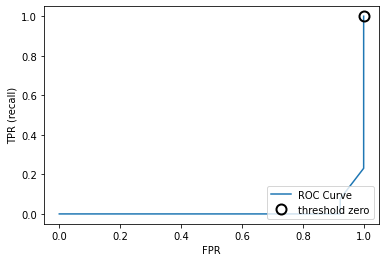

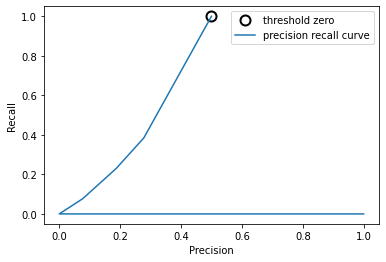

Test set predictions:
 [1 2 1 2 2 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2]
Test set score: 0.92
Test set score: 0.92


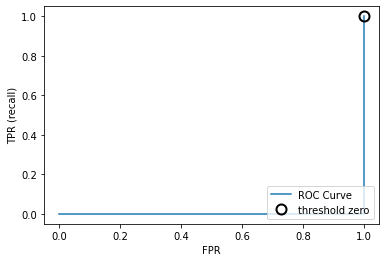

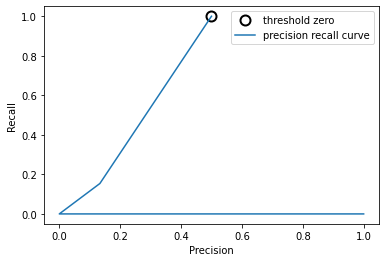

Test set predictions:
 [2 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 1 1]
Test set score: 1.00
Test set score: 1.00


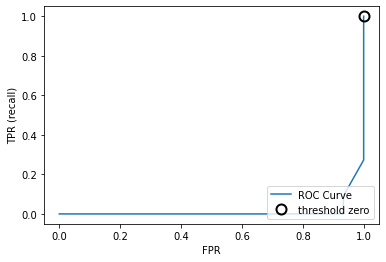

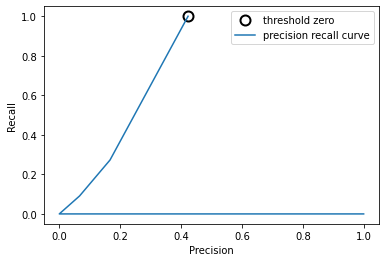

Test set predictions:
 [1 1 2 1 2 1 2 1 2 2 1 1 1 1 1 2 2 1 2 1 2 2 1 2 1 2]
Test set score: 0.96
Test set score: 0.96


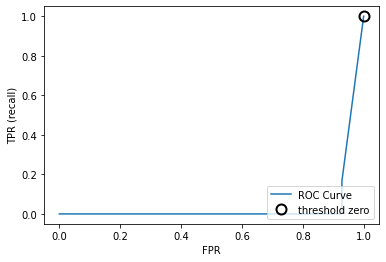

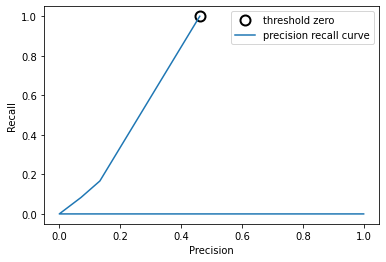

Test set predictions:
 [1 1 1 1 2 2 2 1 2 2 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 2]
Test set score: 0.96
Test set score: 0.96


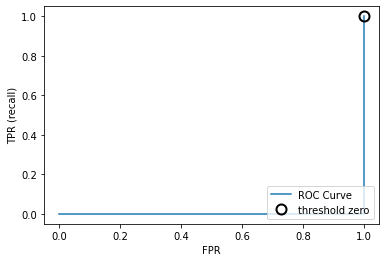

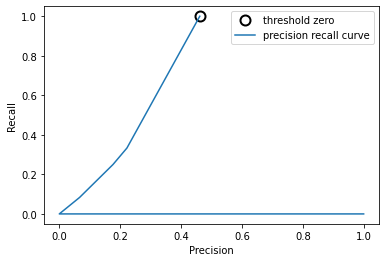

Test set predictions:
 [1 1 1 1 2 1 2 1 2 1 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 2]
Test set score: 0.96
Test set score: 0.96


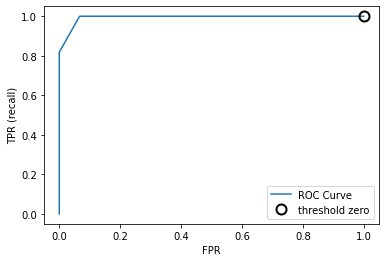

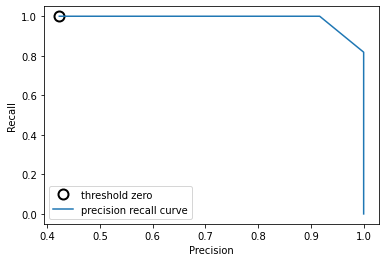

Test set predictions:
 [2 1 1 2 1 1 1 1 1 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 1 1]
Test set score: 0.92
Test set score: 0.92


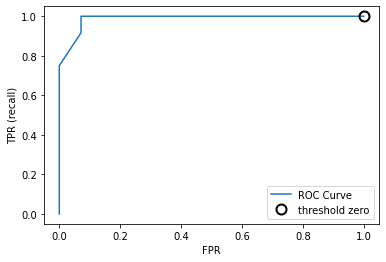

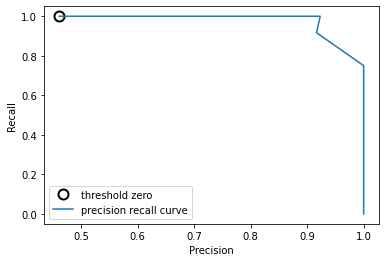

Test set predictions:
 [1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 1 2 2 2 1 2 2]
Test set score: 0.88
Test set score: 0.88


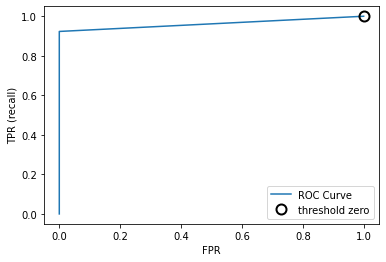

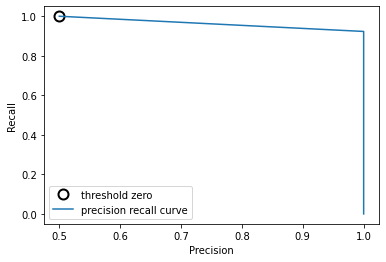

Test set predictions:
 [1 1 2 1 1 1 2 1 2 2 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 2]
Test set score: 0.92
Test set score: 0.92


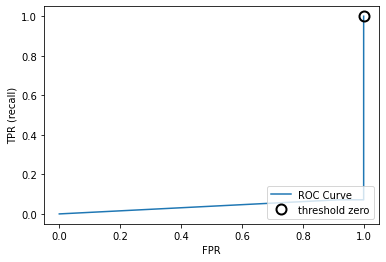

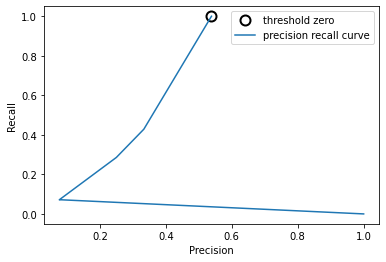

Test set predictions:
 [1 1 1 2 2 1 2 1 2 2 1 2 2 1 2 2 1 1 2 2 2 1 1 1 2 1]
Test set score: 0.96
Test set score: 0.96


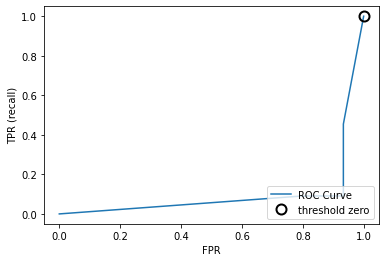

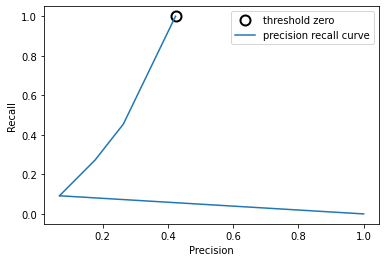

Test set predictions:
 [1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 1 2 1 2 1 1 1 1 2 1 2]
Test set score: 0.92
Test set score: 0.92


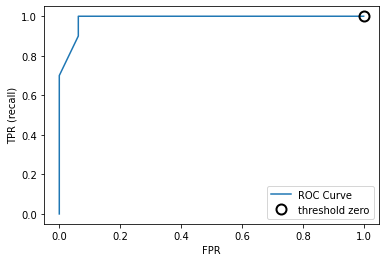

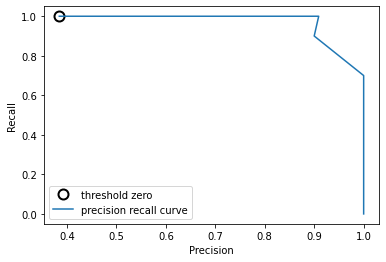

Test set predictions:
 [2 1 1 2 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 2 1 2 1 1 2 2]
Test set score: 0.92
Test set score: 0.92


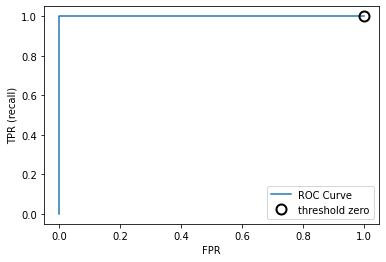

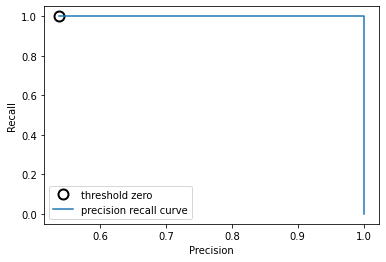

Test set predictions:
 [1 2 2 2 1 1 2 1 2 2 2 1 1 2 1 2 2 2 2 1 2 1 2 2 1 2]
Test set score: 0.88
Test set score: 0.88


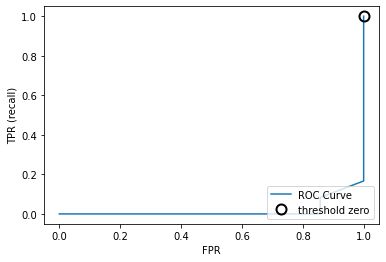

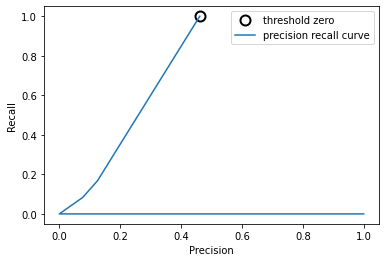

Test set predictions:
 [1 2 2 1 2 1 2 2 2 2 1 1 2 1 1 2 2 1 1 1 1 2 2 2 2 1]
Test set score: 0.92
Test set score: 0.92


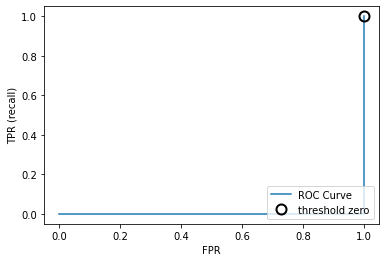

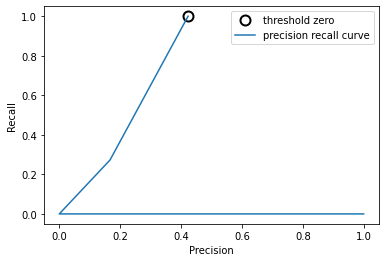

Test set predictions:
 [1 2 1 1 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 1 2 2 1]
Test set score: 1.00
Test set score: 1.00


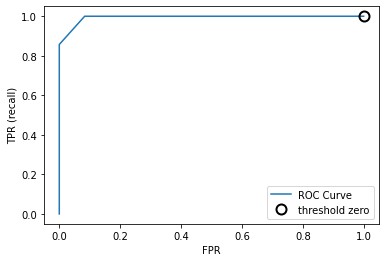

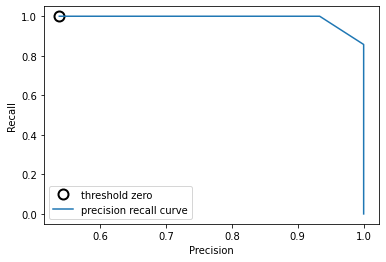

Test set predictions:
 [2 2 1 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 1 2 2 1 2 2 1]
Test set score: 0.88
Test set score: 0.88


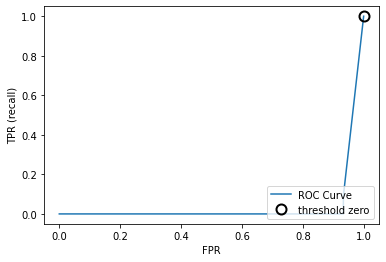

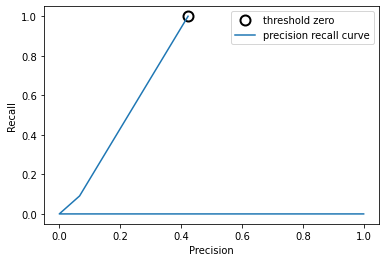

Test set predictions:
 [1 2 1 1 2 1 2 1 2 2 2 1 2 2 1 1 1 1 2 1 2 1 2 2 1 2]
Test set score: 0.92
Test set score: 0.92


In [2]:
iris_dataset = load_iris()
metric=['minkowski', 'manhattan', 'euclidean', 'chebyshev']
iris_dataset=({"data": iris_dataset["data"][49:],"target": iris_dataset["target"][49:]})

for i in range(2, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=5)
    X_train, X_test, y_train, y_test = train_test_split(
     iris_dataset['data'], iris_dataset['target'], random_state=i)
    knn.fit(X_train, y_train)
    prob=knn.predict_proba(X_test)
    prob1=[]
    for j in range(len(prob)):
        prob1.append(prob[j][1])
        
    prob1=np.array(prob1)
    fpr, tpr, thresholds = roc_curve(y_test, prob1,pos_label=2)
    plot(fpr, tpr, label="ROC Curve")
    xlabel("FPR")
    ylabel("TPR (recall)")
    close_zero = np.argmin(np.abs(thresholds))
    plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    legend(loc=4)
    show()
    precision, recall, thresholds = precision_recall_curve(y_test, prob1,pos_label=2)
    close_zero = np.argmin(np.abs(thresholds))
    y_pred = knn.predict(X_test)
    plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plot(precision, recall, label="precision recall curve")
    xlabel("Precision")
    ylabel("Recall")
    legend(loc="best")
    show()
    print("Test set predictions:\n", y_pred)
    print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
    print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))